# Telecom X

# Tabla de contenido
- [Importación de datos](#importación-de-datos)
- [Limpieza de datos](#limpieza-de-datos)
- [Análisis Exploratorio](#análisis-exploratorio)
- [Análisis de correlación entre variables](#análisis-de-correlación-entre-variables)
- [Guardando el archivo](#guardando-el-archivo)
- [Informe final](#informe-final)

## Importación de datos

In [1]:
# Librerias
import pandas as pd
import numpy as np
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Datos
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# DataFrame
df = pd.read_json(url)

# Revisión
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Columnas del dataset
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [4]:
# Columnas no normalizadas
normal = df.columns[2:]

# Normalización y unión con el dataframe
for i in range(len(normal)):
    norm = pd.json_normalize(df[normal[i]])
    print(norm.shape)
    df.drop(normal[i], axis=1, inplace=True)
    df = df.join(norm)

# Revisión
df.head()

(7267, 5)
(7267, 2)
(7267, 7)
(7267, 5)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Limpieza de datos

### Conozca el conjunto de datos

In [5]:
# Columnas del dataset
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [6]:
# Tipos de datos del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


**Diccionario de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

**Columnas más relevantes para el análisis:**
1. `customerID`: Esta columna es para identificar al cliente de forma unica
2. `Churn`: Es la que nos indica si el cliente abandono o no
3. `ternure`: Nos dice por cuanto tiempo el cliente estuvo en la empresa
4. `PhoneService`: Columna para conocer las preferencias del cliente
5. `InternetService`: Columna para conocer las preferencias del cliente
6. `TechSupport`: Columna para conocer las preferencias del cliente
7. `StreamingTV`: Columna para conocer las preferencias del cliente
8. `StreamingMovies`: Columna para conocer las preferencias del cliente
9. `Contract`: El tipo de contrato que tiene el cliente
10. `Charges.Monthly`: Total de los servicios del cliente, para conocer su facturación
11. `Charges.Total`: Todo lo que gastó el cliente en los servicios

### Comprobación de incoherencias en los datos

In [7]:
# Revisión de datos duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
# Revisión de datos nulos y de tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
# Estadísticas de datos categóricos
df.describe(include=["O"])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2
freq,1,5174,3675,3749,5086,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [10]:
# Revisión de columnas importantes
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [11]:
df["InternetService"].value_counts()

InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

In [12]:
df["TechSupport"].value_counts()

TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64

In [13]:
df["StreamingTV"].value_counts()

StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64

In [14]:
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64

In [15]:
df["Contract"].value_counts()

Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

In [16]:
df["Charges.Total"].head()

0      593.3
1      542.4
2     280.85
3    1237.85
4      267.4
Name: Charges.Total, dtype: object

In [17]:
df[["tenure", "Charges.Monthly"]].describe()

,tenure,Charges.Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


### Manejo de inconsistencias

In [18]:
# Reemplazo de datos inconsistentes con la moda
print(df["Churn"].mode())
df["Churn"] = df["Churn"].apply(lambda x: "No" if (x != "Yes") & (x != "No") else x)
df["Churn"].value_counts()

0    No
Name: Churn, dtype: object


Churn
No     5398
Yes    1869
Name: count, dtype: int64

In [19]:
# Convertir columna categórica a numérica
df["Charges.Total"] = df["Charges.Total"].str.strip().replace("", "0")
df["Charges.Total"] = df["Charges.Total"].astype(np.float64)
df["Charges.Total"].head()

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: Charges.Total, dtype: float64

In [20]:
df[["tenure", "Charges.Monthly", "Charges.Total"]].describe()

,tenure,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035
std,24.571773,30.129572,2268.648587
min,0.000000,18.250000,0.000000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


In [21]:
num_col = ["tenure", "Charges.Monthly", "Charges.Total"]

print("Kurtosis de columnas numéricas importantes el dataset (para identificar atípicos)")

for i in num_col:
    print(f"Columna {i}: {df[i].kurtosis()}")

Kurtosis de columnas numéricas importantes el dataset (para identificar atípicos)
Columna tenure: -1.3889808474365166
Columna Charges.Monthly: -1.2615115235678378
Columna Charges.Total: -0.22733025208576452


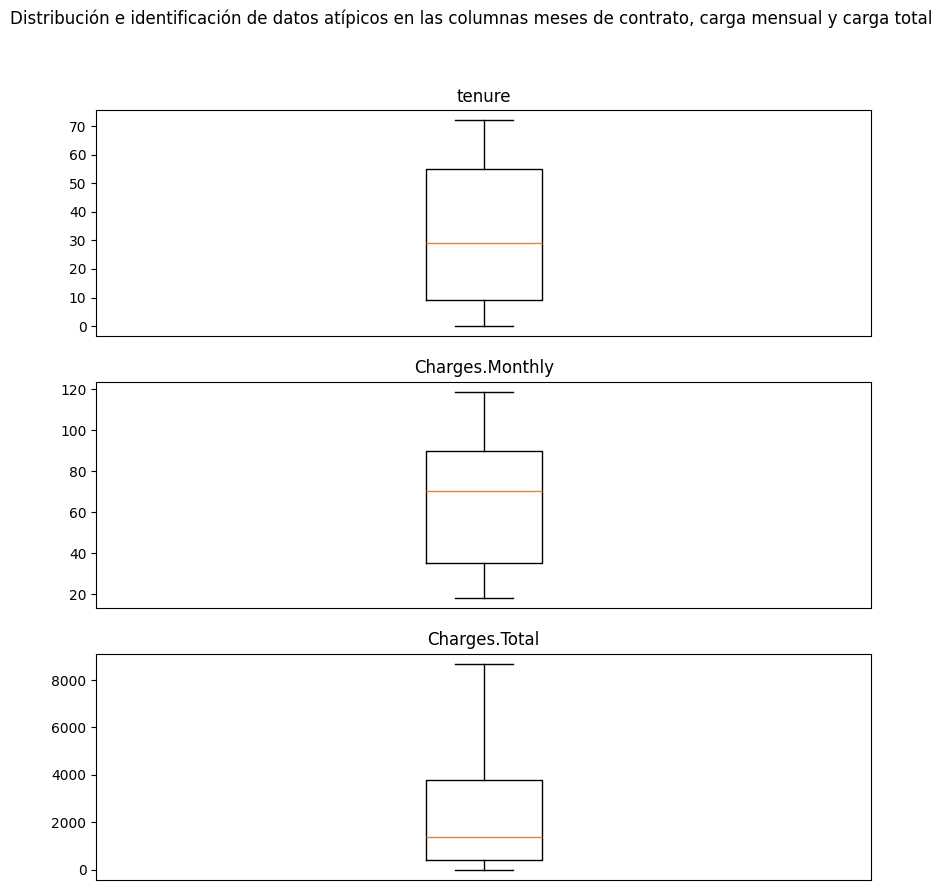

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle("Distribución e identificación de datos atípicos en las columnas meses de contrato, carga mensual y carga total")
for i in range(len(num_col)):
    ax[i].boxplot(df[num_col[i]])
    ax[i].set_title(num_col[i])
    ax[i].xaxis.set_visible(False)

### Columna de cuentas diarias

In [23]:
df["Cuentas_Diarias"] = df["Charges.Monthly"]/30
df["Cuentas_Diarias"].head(5)

0    2.186667
1    1.996667
2    2.463333
3    3.266667
4    2.796667
Name: Cuentas_Diarias, dtype: float64

### Estandarización y transformación de datos

In [24]:
moreImportants = ["customerID", "Churn", "tenure", "PhoneService", "InternetService", "TechSupport", "StreamingTV", "StreamingMovies", 
                  "Contract", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

df[moreImportants].head()

,customerID,Churn,tenure,PhoneService,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,9,Yes,DSL,Yes,Yes,No,One year,65.6,593.30,2.186667
1,0003-MKNFE,No,9,Yes,DSL,No,No,Yes,Month-to-month,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,4,Yes,Fiber optic,No,No,No,Month-to-month,73.9,280.85,2.463333
3,0011-IGKFF,Yes,13,Yes,Fiber optic,No,Yes,Yes,Month-to-month,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,3,Yes,Fiber optic,Yes,Yes,No,Month-to-month,83.9,267.40,2.796667


In [25]:
df[["Churn", "PhoneService"]] = df[["Churn", "PhoneService"]].map(lambda x: 0 if x == "No" else 1)

## Análisis Exploratorio

### Análisis Descriptivo

In [26]:
df[moreImportants].describe(include=["O"])

,customerID,InternetService,TechSupport,StreamingTV,StreamingMovies,Contract
count,7267,7267,7267,7267,7267,7267
unique,7267,3,3,3,3,3
top,0002-ORFBO,Fiber optic,No,No,No,Month-to-month
freq,1,3198,3582,2896,2870,4005


In [27]:
df[moreImportants].describe()

,Churn,tenure,PhoneService,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,32.346498,0.902711,64.720098,2277.182035,2.157337
std,0.437115,24.571773,0.296371,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,1.000000,35.425000,396.200000,1.180833
50%,0.000000,29.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,55.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


### Distribución de evasión

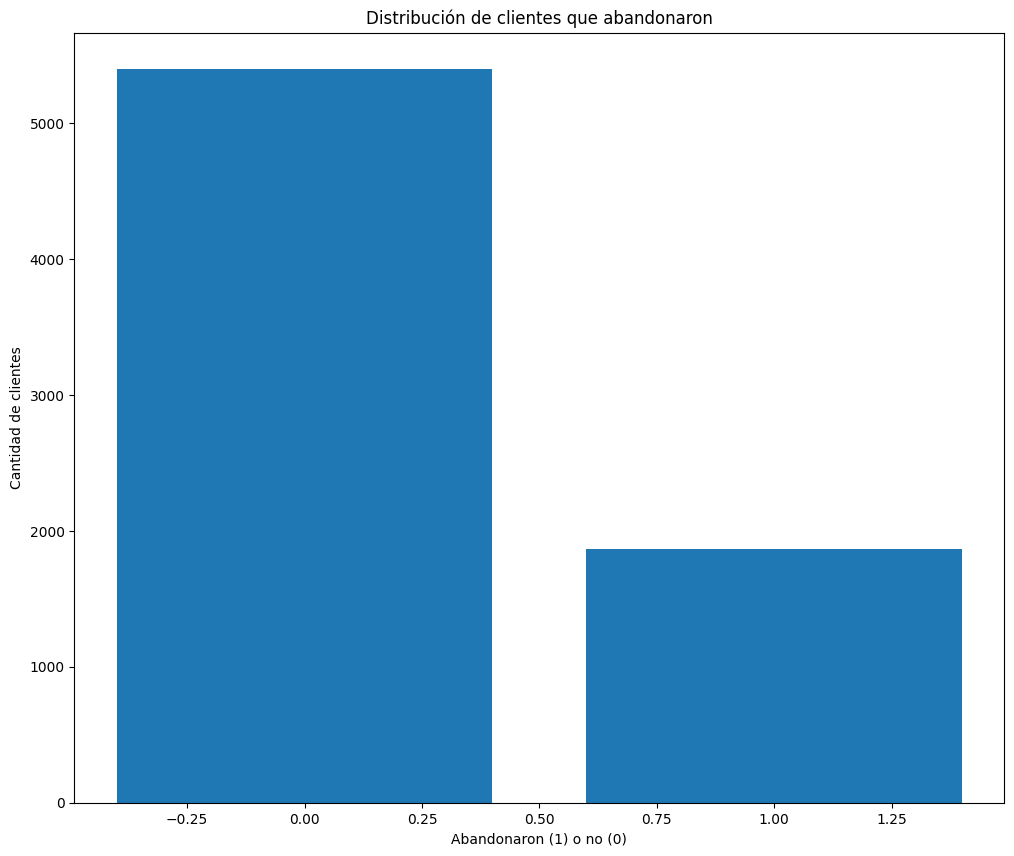

In [28]:
plt.figure(figsize=(12, 10))
plt.bar(df["Churn"].value_counts().index, df["Churn"].value_counts().values)
plt.title("Distribución de clientes que abandonaron")
plt.xlabel("Abandonaron (1) o no (0)")
plt.ylabel("Cantidad de clientes")
plt.savefig("img/Distribucion_de_clientes_que_abandonaron.png")
plt.show()

### Recuento de evasión por variables categóricas

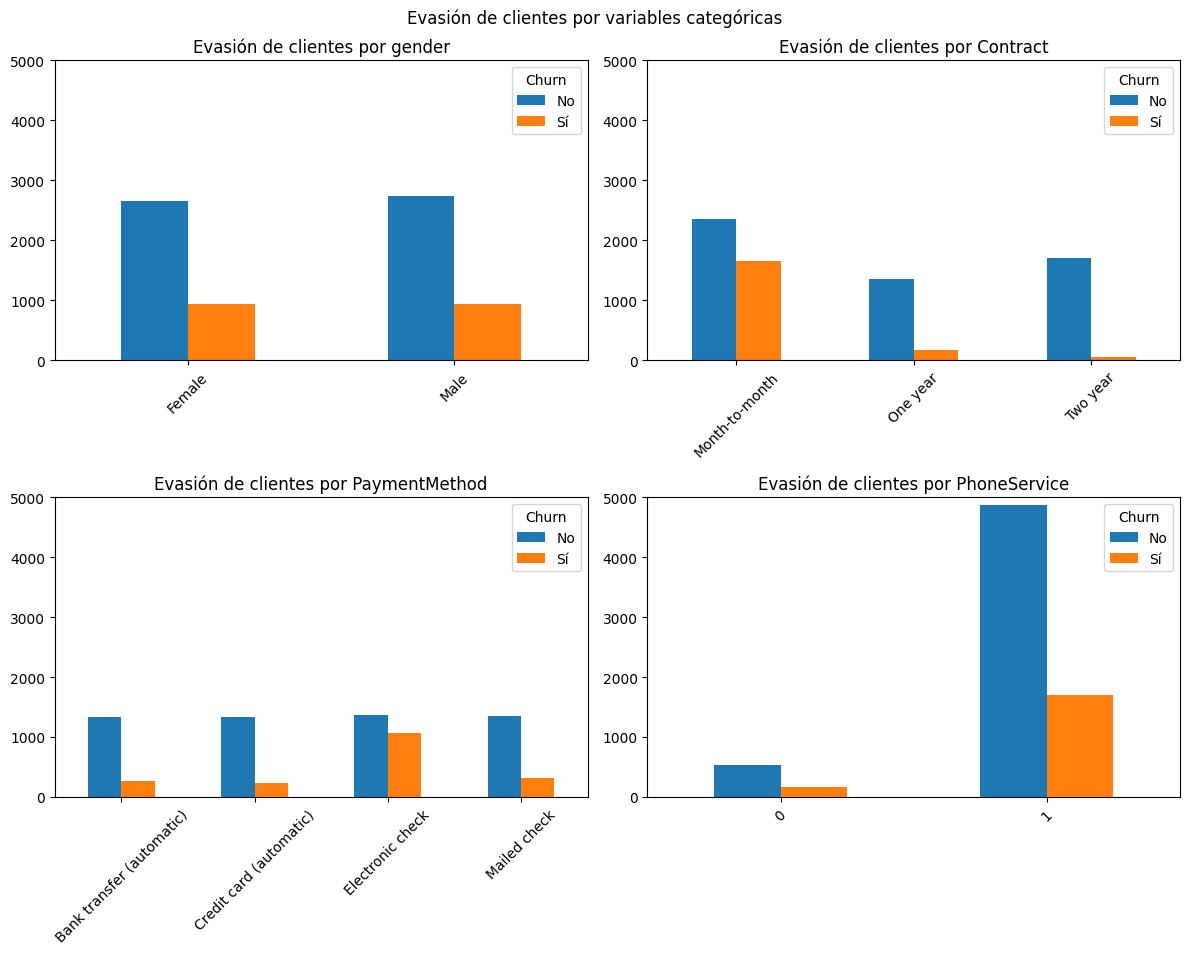

In [29]:
bar_cols = ["gender", "Contract", "PaymentMethod", "PhoneService"]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Evasión de clientes por variables categóricas")
axes = ax.flatten()

for i, col in enumerate(bar_cols):
    cross = pd.crosstab(df[col], df["Churn"])
    cross.plot(kind="bar", ax=axes[i], rot=45)
    axes[i].set_title(f"Evasión de clientes por {bar_cols[i]}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_ylim(0, 5000)
    axes[i].legend(title="Churn", labels=["No", "Sí"])

plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()

In [30]:
# Guardando imágen
plt.savefig("img/Evasion_de_clientes_por_variables_categoricas.png")

<Figure size 640x480 with 0 Axes>

### Conteo de evasión por variables numéricas

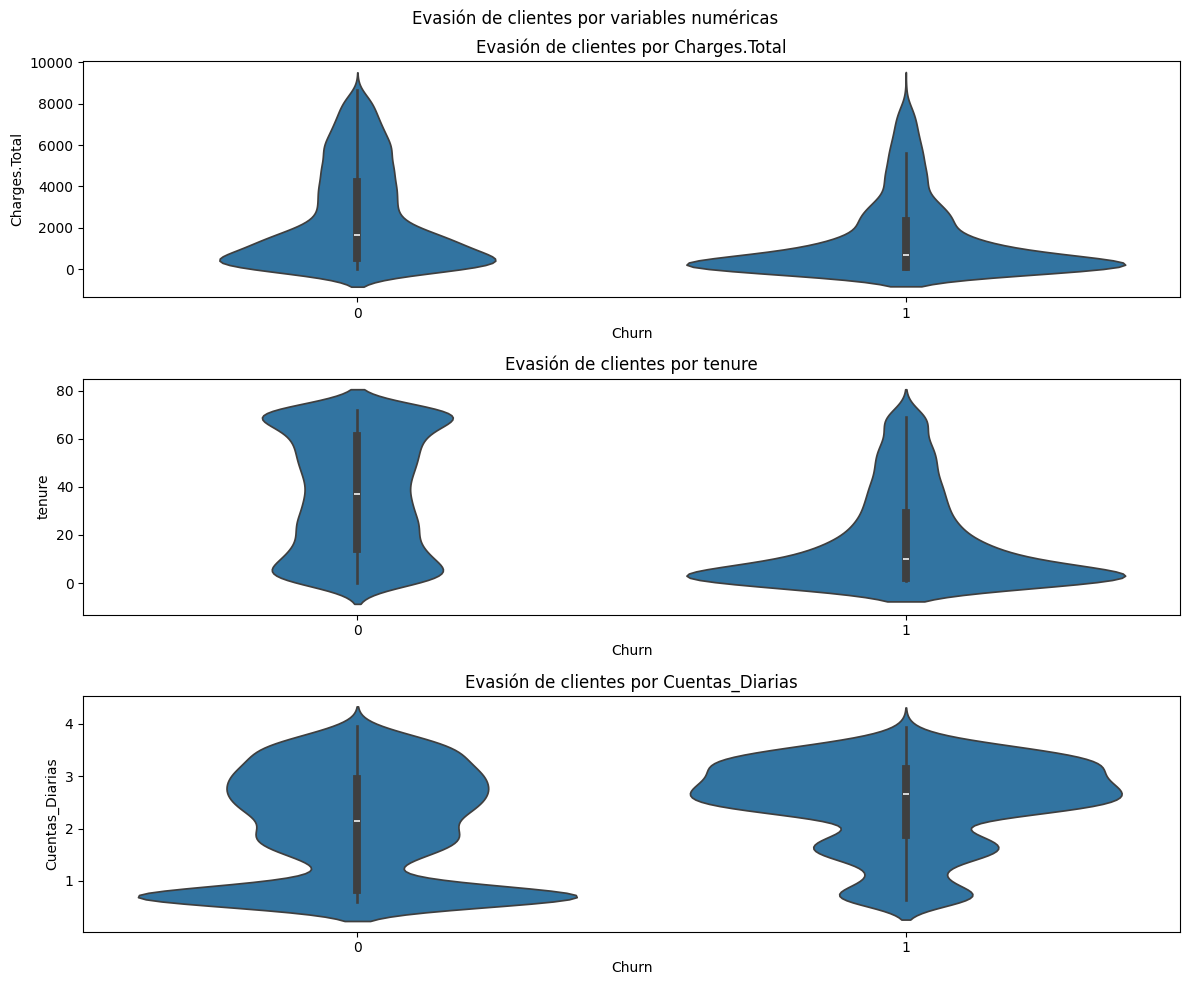

In [31]:
vio_cols = ["Charges.Total", "tenure", "Cuentas_Diarias"]

fig, ax = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle("Evasión de clientes por variables numéricas")
axes = ax.flatten()

for i in range(len(vio_cols)):
    sns.violinplot(data=df, x="Churn", y=vio_cols[i], ax=axes[i])
    axes[i].set_title(f"Evasión de clientes por {vio_cols[i]}")

plt.tight_layout()
plt.show()

In [32]:
# Guardando imágen
plt.savefig("img/Evasion_de_clientes_por_variables_numericas.png")

<Figure size 640x480 with 0 Axes>

## Análisis de correlación entre variables

In [33]:
df[["Churn", "Cuentas_Diarias"]].corr()

,Churn,Cuentas_Diarias
Churn,1.000000,0.189866
Cuentas_Diarias,0.189866,1.000000


In [34]:
df[["Churn", "PhoneService"]].corr()

,Churn,PhoneService
Churn,1.000000,0.012571
PhoneService,0.012571,1.000000


In [35]:
df[["Churn", "tenure"]].corr()

,Churn,tenure
Churn,1.000000,-0.344079
tenure,-0.344079,1.000000


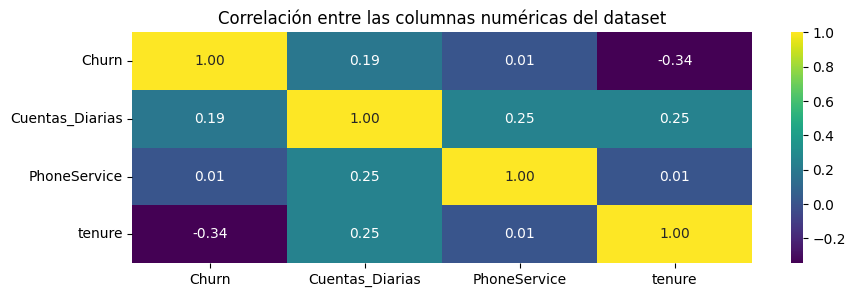

In [36]:
plt.figure(figsize=(10, 3))
sns.heatmap(df[["Churn", "Cuentas_Diarias", "PhoneService", "tenure"]].corr(), annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlación entre las columnas numéricas del dataset")
plt.show()

## Guardando el archivo

In [37]:
df = df[moreImportants]
df.to_csv("TelecomX_Data_prepared.csv", index=False)

## Informe final

### Introducción
**Objetivo del análisis:** Explorar datos de la empresa Telecom X para explicar un problema de evasión de clientes en la misma, explicación que por ellos mismos no pueden dar.

**Problema:** Los empresa esta sufriendo abandonos del 26% del total de clientes. Más exactamente, aproximadamente 1800 de sus clientes están abandonando la organización.

### Limpieza y tratamiento de datos
Pasos realizados en la extracción y transformación:
- **Importación:** Los datos se extrajeron de Github y se importaron como un DataFrame de la libreria pandas en python.
- **Limpieza:** Los datos eran muy incomodos de leer, por lo que se hizo un proceso de normalización el cual lo extiende para sea más legible.
- **Procesamiento:** Al limpiar los datos, se revisaron las columnas más relevantes y solo se proceso la columna *Churn* (la cuál tenia registros vacios que se reemplazarón con "No" al ser la moda de la variable) y *Charges.Total* (la cual tenia registros vacios y se hizo algo parecido). Las demás columnas categóricas no presentaron problemas y las numéricas no presentaron datos atípicos con diferentes técnicas para identificarlos.

### Análisis Exploratorio de datos (EDA)
Como se había comentado, el 26% de los clientes abandona la compañía. Las razones pueden deberse por:
1. `Cancelación de contrato mensual`: Este punto se refiere a que los clientes que realizan contratos mensuales tienen más chances de abandonar la empresa, siendo muy pocos los casos donde clientes con contratos de un año o dos cancelan.
2. `Cancelación por el método de pago`: La mayoría de los clientes que abandonan la empresa tienen un método de pago de cheque electrónico. Este método puede no ser el más cómodo a diferencia de los métodos automáticos (transferencia bancaria y tarjeta de crédito). De hecho, otro método un poco más cómodo es que las facturas sean via email y las personas que abandonan con este método no son tantas.

### Gráficos
Los siguientes gráficos presentados serviran para respladar las informaciones anteriores
![Evasion de clientes por variables categoricas](img/Evasion_de_clientes_por_variables_categoricas.png)
![Evasion de clientes por variables numericas](img/Evasion_de_clientes_por_variables_numericas.png)

### Conclusiones e Insights
En conclusión, la empresa sufre abandono de clientes debido a contratos que los clientes aceptan, son poco extendidos y los métodos de pagos pueden tener algún tipo de problema con los clientes

Los clientes que abandonaron son los que más cuentan con estas características. Mayormente estas conclusiones están basadas en los clientes que aún permanecen, dejando pistas de como retener actuales y futuros clientes.

### Recomendaciones
1. `Investigar métodos de pago`: Investigar los métodos de pago automáticos como la transferencia de banco o las tarjetas de credito. Pueden ser posibles problemas como tiempo de facturación tardío, precios aumentados de forma sospechosa u otra razón de seguridad.
2. `Variedad de tiempos de contratación`: Variar los tiempos de los contratos pueden ayudar a crear compromisos que poco a poco indiquen con más detalle los clientes que pueden permanecer y los que pueden abandonar. Tiempos trimestrales, cuatrimestrales o semestrales pueden indicar una mayor probabilidad de que los clientes con estos contratos permanezcan en la empresa.